# CSMODEL Case Study - Phase 1

### Members:
- Angelo Guerra
- Adrian Yung Cheng
- Mark Daniel Gutierrez
- Alina Sayo

**Section**: S15

**Instructor**: Mr. Gabriel Avelino Sampedro

In this notebook, we will be using the **[Spotify Top Hits from 2000-2019](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data)** Dataset. The notebook will cover an analysis of the raw dataset and various processes to extract meaningful insights and conclusions from the data.


## Importing Libraries

First, import the necessary libraries to perform data operation throughout this notebook:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

* **Numpy** - Numpy is a software library for Python designed for working with arrays and encompassing functions related to linear algebra, fourier transforms, and matrices.
* **Pandas** - Pandas is a software library for Python designed for data manipulation and data analysis.
*  **Matplotlib** - Matplotlib is a software library for data visualization for Python, allowing us to easily render various types of graphs.
* **Seaborn** - Seaborn is a software library for data visualization for Python designed to create attractive and informative statistical graphics, making it easier to make complex visualizations compared to using Matplotlib alone.

## Dataset Description

### Brief Description

The dataset used throughout this notebook consists of a `.csv` file containing audio statistics of the top 2000 tracks from 2000-2019 on Spotify, a global audio streaming service. The data contains information about each track and its qualities, including the song artist, the year it was released, the popularity rate, and various characteristics. The dataset takes advantage of Spotify's huge collection of music to create a useful resource that could help those who want to statistically assess and analyze the platform's top hits from the past two decades.

### Collection Process

The dataset **[Top Hits Spotify 2000-2019](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data)** was collected from a popular digital music streaming service called Spotify and was posted on Kaggle by user Mark Koverha. This dataset draws from Spotify’s extensive music catalog to create a comprehensive resource. Spotify has created multiple playlists for the top hits of each year. The data was then extracted from these playlists and Koverha collected it using the `Spotipy` library for Python.

Currently, Spotify provides a publicly available API. The Spotify Web API and the `Spotipy` Python library were utilized to gather track information to compile the dataset.

### Dataset File Structure

Each entry in the dataset is part of the top 2000 hit songs released during the year 2000 until 2019. On the other hand, each column represents a single component of the track that would detail its qualities, such as its artist name, title, and many other aspects, with a total of eighteen (18) specific variables to account for. There are a total of **2000 entries** and **18 variables** in the dataset.

The `read_csv()` function of the pandas library, in this case, is used to assign the dataset to a properly-usable variable in Python. The `info()` function, on the other hand, is used to display the general information about the dataset itself.

Now, let us load the data from the `songs_normalize.csv` file using the `read_csv` function and assign the resulting dataframe to the variable `spotify_df`. Then, we can use the `info` function to display a quick summary of how the data is structured.

In [2]:
spotify_df = pd.read_csv('songs_normalize.csv')
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


The `shape` function determines the dimensions of the dataframe (dataset) by getting the number of entries (rows) and variables (columns) and displaying them in a 2-tuple.

In [3]:
spotify_df.shape

(2000, 18)

Based on the code execution above, there are indeed **2000** entries and **18** variables present in the dataset.

We can then use the `describe()` function to provide a statistical description of the dataset and its variables that contain numerical data, which includes the count, mean, standard deviation, quartiles, and minimum/maximum values.

In [4]:
spotify_df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


By calling the `head()` function of the pandas library, the program will now display the first 5 (default value) rows/entries of the dataset. 

In [5]:
spotify_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


To display the last 5 (default value) rows of the dataset, the `tail()` function will be used.

In [6]:
spotify_df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


### Variables

Each variable included in the dataset is a generalized form of specifying the different entries of the dataset in a substantial manner. The following are the variables used, their description/representation and data type:

| Variable         | Description/Representation | Datatype |
|------------------|----------------------------|----------|
| Artist           | The track's singer.    | Object |
| Title            | The track's name. | Object  |
| Duration_ms      | The track's duration in milliseconds.  | Integer |
| Explicit         | Dictates whether or not the track contains explicit content.    | Boolean |
| Year             | The track's release year.             | Integer |
| Popularity       | A measure that quantifies the popularity of the song. Ranges from 0 (least popular) to 100 (most popular). | Integer |
| Danceability     | A measure that represents the measure of a song's beat strength, rhythm stability, and tempo. Ranges from 0.0 (least danceable) to 1.0 (most danceable). | Float |
| Energy           | A measure of the track's intensity and activity. Ranges from 0.0 (least energy) to 1.0 (most energy). | Float |
| Key              | The music key of the track, represented as integers using the standard Pitch Class notation. If no key is detected, the value is -1. | Integer |
| Loudness         | A measure of the overall loudness of the track in decibels (dB), averaged across the entire track. | Float |
| Mode             | Indicates whether the track is in a major (1) or minor (0) scale. | Integer |
| Speechiness      | Measures the presence of spoken words in the track, with values closer to 1.0 indicating more speech content. While values closer to 0.0 most likely represent music and other non-speech-like tracks. | Float |
| Acousticness     | A confidence measure of whether the track is acoustic, with 1.0 representing high confidence that the track is acoustic. | Float |
| Instrumentalness | Predicts whether the track contains vocals, with values closer to 1.0 indicating a higher likelihood of no vocal content. | Float |
| Liveness         | Detects the presence of an audience in the recording, with higher values closer to 1.0 suggesting a live performance. | Float |
| Valence          | A measure describing the music positiveness of the track, ranging from 0.0 (negative emotions) to 1.0 (positive emotions). Where tracks with high valence sound happier and tracks with low valence sound sadder. | Float |
| Tempo            | The estimated tempo (speed or pace) of the track in beats per minute (BPM). | Float |
| Genre            | The genre of the track.    | Object |

## Data Cleaning

Before exploring and analyzing the dataset, data cleaning and preprocessing techniques shall first be performed to address inconsistencies within the dataset that could result in any erroneous data analysis.

The researchers have specifically checked for the following aspects of the dataset:
- Removing unused variables
- Checking for multiple representations in each variable
- Incorrect datatype of a variable
- Default values of a variable
- Missing data
- Duplicate data
- Inconsistent formatting of values

### Removing Unused Variables

To remove a specific entry or column from the dataset, the `drop()` function is called.

The researchers decided to remove the variables deemed unnecessary or outside the scope of this study. These consisted of numerical variables not concerned with the research question.

In [7]:
# Drop unnecessary variables
spotify_df = spotify_df.drop(['explicit', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'genre'], axis = 1)
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   year              2000 non-null   int64  
 4   popularity        2000 non-null   int64  
 5   energy            2000 non-null   float64
 6   instrumentalness  2000 non-null   float64
 7   tempo             2000 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 125.1+ KB


The variables `explicit`, `danceability`, `key`, `loudness`, `mode`, `speechiness`, `valence`, and `genre` were removed because such components shall not be used in this study. In this way, the study will only be focusing on the necessary variables.

### Check for Multiple Representations

To check whether or not the dataset contains multiple representations of values for variables with categorical data, the `value_counts()` function of the pandas library can be called to return the count of each unique value in the Series.

In [8]:
# Check if there are any mispelled or incorrect values in Artist
print(spotify_df['artist'].value_counts())

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: count, Length: 835, dtype: int64


In [9]:
# Check if there are any mispelled or incorrect values in Song
print(spotify_df['song'].value_counts())

song
Sorry                   5
Don't                   3
Closer                  3
Breathe                 3
It's My Life            3
                       ..
Dani California         1
What Hurts The Most     1
You Know I'm No Good    1
Ms. New Booty           1
Circles                 1
Name: count, Length: 1879, dtype: int64


According to the results executed by the code, all unique values within the `artist` and `song` categorical variables of the dataset fit their valid parameters and are correctly represented.

### Check for Incorrect Datatypes

To check the data type of every variable/column in the dataset, the `dtypes` property of a dataframe in the pandas library can also be called aside from the `info()` function to assess whether the assigned datatype is correct for the corresponding variable. The code below will list down every variable and its corresponding data type.

In [10]:
spotify_df.dtypes

artist               object
song                 object
duration_ms           int64
year                  int64
popularity            int64
energy              float64
instrumentalness    float64
tempo               float64
dtype: object

Based on the datatypes displayed from the code execution, all variables in the dataset have their appropriate corresponding datatype assigned to them based on their description.

### Check for Default Values

To check if there exist default values placed per variable in the dataset, the `unique()` method can be used to list down all unique values per variable.

In [11]:
for col in spotify_df:
    print("'{}' column's unique values:\n".format(col), spotify_df[col].unique())
    print("")

'artist' column's unique values:
 ['Britney Spears' 'blink-182' 'Faith Hill' 'Bon Jovi' '*NSYNC' 'Sisqo'
 'Eminem' 'Robbie Williams' "Destiny's Child" 'Modjo' "Gigi D'Agostino"
 'Eiffel 65' "Bomfunk MC's" 'Sting' 'Melanie C' 'Aaliyah' 'Anastacia'
 'Alice Deejay' 'Dr. Dre' 'Linkin Park' 'Tom Jones' 'Sonique' 'M.O.P.'
 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane' 'DMX'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Montell Jordan' 'Kylie Minogue'
 'JAY-Z' 'LeAnn Rimes' 'Avant' 'Enrique Iglesias' 'Toni Braxton' 'Bow Wow'
 'Missy Elliott' 'Backstreet Boys' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'Mariah Carey'
 'Baha Men' 'Donell Jones' 'Oasis' 'DJ Ötzi' 'P!nk' 'Craig David'
 'Christina Aguilera' 'Red Hot Chili Peppers' 'Sammie' 'Santana' 'Kandi'
 'Vengaboys' 'Ronan Keating' 'Madison Avenue' 'Céline Dion' '3 Doors Down'
 'Carl Thomas' 'Mystikal' 'Fuel' 'Savage Garden' 'Westlife' 'All Saints'
 'Erykah Badu' 'Marc Anthony' 'Matchbox Twenty' 'G

According to the results provided by the function, only the `year` variable contained data that did not fit its parameters (years from 2000 to 2019 only). The rest of the variables' unique values fit their respective parameters based on their description.

Given this finding, the dataframe could be preprocessed and filtered to include entries only within the valid timeframe through querying.

In [12]:
# Select entries that have a release year date from 2000 to 2019 only, then assign back to the dataframe
spotify_df = spotify_df[(spotify_df['year'] >= 2000) & (spotify_df['year'] <= 2019)]
spotify_df.shape

(1958, 8)

After dropping the invalid records, calling the `shape` of the newly-updated dataset displayed only **1958 remaining entries**. This meant that out of the initial 2000 entries of the dataset, there were **42 invalid entries** removed.

### Check for Missing Data

To check for missing data within the dataset, the `isnull()` and `any()` functions can be used to assess if there exists null values per variable represented as `NaN` or `null`. The given function call will list each variable with a boolean value indicating whether it has null values or none.

In [13]:
spotify_df.isnull().any()

artist              False
song                False
duration_ms         False
year                False
popularity          False
energy              False
instrumentalness    False
tempo               False
dtype: bool

Based on the results provided by the code execution, all the variables in the dataset do not contain any null values.

### Check for Duplicate Data

To check for duplicated data within the dataset, the `duplicated()`  and `any()` function can be called to identify whether or not there are duplicate records. The code below will either return a boolean value `True` if there exist repeated records and `False` if there are none.

In [14]:
spotify_df.duplicated().any()

True

Based on the provided result of the function, we can conclude the dataset contains duplicate records. Given this finding, the `drop_duplicates()` function can be used to remove these records.

In [15]:
spotify_df = spotify_df.drop_duplicates()
spotify_df.shape

(1899, 8)

The new dataset that does not include duplicate records now contain **1899 unique records**. This meant that there were **59 duplicate records** present in the initial dataset.

### Checking for Inconsistent Formatting

To check if there exist any values in the dataset with inconsistent formatting, the `unique()` function can once again be called. The code below will list down all the unique values in a given variable.

In [16]:
for col in spotify_df:
    print("'{}' column's unique values:\n".format(col), spotify_df[col].unique())
    print("")

'artist' column's unique values:
 ['Britney Spears' 'Bon Jovi' '*NSYNC' 'Eminem' 'Robbie Williams' 'Modjo'
 "Gigi D'Agostino" "Bomfunk MC's" 'Aaliyah' 'Alice Deejay' 'Linkin Park'
 'Sonique' 'M.O.P.' 'Limp Bizkit' 'Darude' 'Da Brat' 'Moloko' 'Chicane'
 'Debelah Morgan' 'Madonna' 'Ruff Endz' 'Kylie Minogue' 'LeAnn Rimes'
 'Avant' 'Toni Braxton' 'Bow Wow' 'Samantha Mumba' 'Mýa' 'Mary Mary'
 'Next' 'Janet Jackson' 'Ricky Martin' 'Jagged Edge' 'JAY-Z' 'Baha Men'
 'Oasis' 'DJ Ötzi' 'P!nk' 'Mariah Carey' 'Craig David' 'Sammie' 'Kandi'
 'Vengaboys' 'Ronan Keating' '3 Doors Down' 'Carl Thomas' 'Mystikal'
 'Fuel' 'Westlife' 'All Saints' "Destiny's Child" 'Erykah Badu'
 'Matchbox Twenty' 'Gabrielle' 'Backstreet Boys' 'The Corrs' 'Joe' 'Nelly'
 'Shaggy' 'Christina Aguilera' 'Nelly Furtado' 'Shakira' 'Jimmy Eat World'
 'Train' 'Geri Halliwell' 'Blu Cantrell' 'Missy Elliott' 'Mary J. Blige'
 'Faithless' 'Lasgo' 'iio' 'Emma Bunton' '112' 'Blue' 'Jessica Simpson'
 'Michael Jackson' 'Eve' 'Jennifer Lo

Upon checking the results, the dataset's variables seem to not contain any values with inconsistencies in their formatting based on their corresponding description.

## Exploratory Data Analysis

We are performing Exploratory Data Analysis (EDA) in order to comprehend and orient the dataset in such a way that would be much more efficient to understand. Generally, this involves creating data representations and numerical summaries to properly visualize the nature of the data and create properly-oriented assumptions that would, upon requirement, formulate a specific research question.

One of the key variables included in the dataset is the `year` variable, which essentially indicates the year the top hit track got released. Given the dataset's emphasis on analyzing the evolution of the top hits' qualities over time, the variable and its corresponding relationships represent a potential point of interest that the EDA can be revolved around.

Among the 18 variables in the dataset, 14 are numerical in nature: `duration_ms`, `year`, `popularity`, `danceability`, `energy`, `key`, `loudness`, `mode`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, and `tempo`. However, the EDA for this notebook will only be focusing on the variables `duration_ms`, `instrumentalness` and `tempo` due to their consistent and applicable nature with relations to a song's release year. By analyzing the `year` variable in conjunction with the 5 numerical variables, the researchers can further narrow down the scope of the EDA as well as maintain some form onf consistency in the data analysis strategies used.

With the aforementioned attributes in mind, the following EDA questions are investigated to gain insights into possible patterns associated with the track's release year:

1. What is the distribution of songs according to release year?

2. What is (a) the distribution of songs according to duration and (b) the average duration of top hits per year?

3. What is (a) the distribution of the songs according to their level of instrumentalness and (b) the average instrumentalness level per year?

4. What is (a) the distribution of the songs according to their level of tempo and (b) the average tempo level per year?

5. What is the relationship between the tracks' duration, instrumentalness, and tempo with the release year?

### Question 1: What is the distribution of top hits according to release year?

To answer this question, we obtain our numerical summaries and data visualizations based on the `year` and `song` variables. The `year` variable is used to group and segregate the data into the different release years available, while the `songs` variable possess the top-hits songs released at a specified year.

To begin, we first reassign the required data taken from `spotify_df` into a new dataframe `songs_per_year`. This would indicate the distribution and relationship of the release years available in the `spotify_df` dataframe and the number of songs released each year.

#### Numerical Summaries

Now, we calculate the number of songs in the dataset for each release year. We will be using the `agg` function and `groupby` function to perform numerical summaries regarding the distribution of songs per year in the dataset. The `groupby` function is used to group the data by the `year` variable, while the `agg`  function is used to count the songs within each year. The use of these functions allows for efficient grouping and aggregation operations on the dataset.

In [17]:
songs_per_year = spotify_df.groupby('year').agg({'song':'count'})
songs_per_year

,song
year,
2000,71
2001,106
2002,86
2003,91
2004,95
2005,101
2006,93
2007,90
2008,91


When observed, the new dataframe `songs_per_year` should contain both the release years present in the dataset and their corresponding number of top-hit songs. It is apparent from this data that the song count per year is not equal, which implies that the music industry may have experienced variations in the number of top hits released annually.

In particular, in the year 2000, there were only 71 top hits—marking it as a year with relatively fewer chart-toppers. In contrast, the year 2012 stands out with the highest number of top hits with a total of 113 songs. This variance in the song count over the years showcases the fluctuation in music trends and popularity over the analyzed period.

#### Data Visualization

*Bar Plot*

One of the methods we can utilize to visualize the distribution of `songs` per `year` is a **bar plot** to represent the number of top hits included per release year.

By utilizing matplotlib's `barplot` function, we set the variable on the y-axis to the aggregate of `song`, which depends on the variable on the x-axis, which is the song's release `year`. To make the visualization easier, the data is sourced from the `songs_per_year` dataframe, along with the setting of the desired figure size.

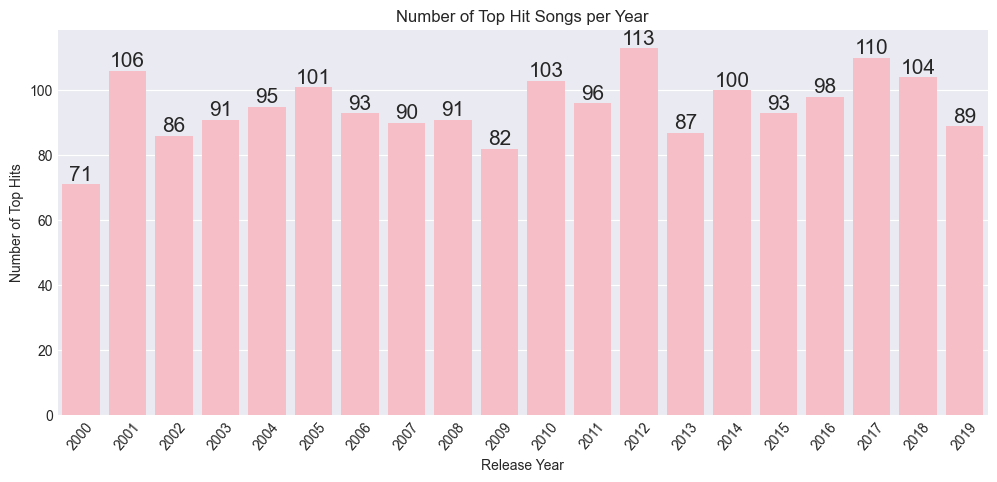

In [18]:
# bar plot of the number of songs per year
plt.figure(figsize=(12, 5))
ax = sb.barplot(x = 'year', y ='song', data = songs_per_year, color='lightpink')

# add labels
plt.title('Number of Top Hit Songs per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Top Hits')
plt.xticks(rotation = 50)

# label on top of each bar
for container in ax.containers:
    ax.bar_label(container, size=15)

plt.show()

Similar to the aforementioned numerical summaries, the bar plot displayed above illustrates the number of top hits in each year from 2000 to 2019. The data shows that 2012 had the most number of top hits with 113 songs, making it the most abundant year for hit songs in the dataset. On the other hand, 2000 had the fewest top hits, with only 71 songs.

Analyzing the trends as the years go by, the early 2000s saw a moderate number of hits, with a steady increase from 2000 to 2005. The count then fluctuated from year to year, with a peak occurring in 2012, possibly reflecting a period of musical diversity and commercial success, followed by a steady decline in the subsequent years. This variation may reflect changing trends in music popularity, industry dynamics, or other external factors.

### Question 2: What is (a) the distribution of songs according to duration and (b) the average duration of top hits per year?

The second question centers around 2 relative concepts: the distribution of songs according to duration, and the average duration of top hits per year. This question mainly revolves around the usage of the `duration_ms` variable and its respective relationship with the `year` variable.

To efficiently obtain the necessary results centered around the `duration_ms` variable, we will be employing the usage of a conversion function that would essentially convert the song duration obtained from the dataframe and change it into a `minute:second` format.

In [19]:
# convert ms to min:sec
def ms_to_min_sec(ms):
    minutes = int(ms / 60000)
    seconds = int((ms % 60000) / 1000)

    if seconds < 10:
        seconds_str = '0' + str(seconds)
    else:
        seconds_str = str(seconds)

    return str(minutes) + ":" + seconds_str

#### Numerical Summaries


We first find the mean, median, and stadard deviation of the `duration_ms` variable to help us understand the central tendencies and the spread of song durations in the dataset. We can find the mean, median, and standard deviation of the `duration_ms` variable using the `mean`, `median`, and `std` functions respectively in the pandas library. Finally, we will be calling the `ms_to_min_sec` function to display the values in `min:sec` format.

In [20]:
mean = ms_to_min_sec(spotify_df['duration_ms'].mean())
median = ms_to_min_sec(spotify_df['duration_ms'].median())
std = ms_to_min_sec(spotify_df['duration_ms'].std())

duration_table = pd.DataFrame({'mean': mean, 'median': median, 'std': std}, index=['duration in min:sec'])
duration_table

,mean,median,std
duration in min:sec,3:48,3:42,0:39


Based on the observations above, the average length of a top hit track is approximately 3 minutes and 48 seconds based on the **mean** duration. The **median** duration, which is approximately 3 minutes and 42 seconds, represents the middle value of the durations when they are sorted which reveals the typical duration of a song in the dataset. Finally, the **standard deviation**, which is approximately 39 seconds, measures the variability or spread in song durations.

Next, we aim at organizing a DataFrame that displays the `mean` and `median` duration of top hits for each year inb the given period. We do this by calculating the `mean` and `median` song duration in miliseconds for each year using the functions `mean` and `median` respectively. Then, we convert these time units into minutes and seconds by applying the `ms_to_min_sec` conversion function. Finally, the resulting DataFrame displays the years and their respective average durations in both mean and median values.

In [21]:
# Organizing a dataframe with the average duration of the top hits from the analyzed period
average_duration = spotify_df[['duration_ms','year']].groupby('year').mean().reset_index()
average_duration['min:sec'] = average_duration['duration_ms'].apply(ms_to_min_sec)
average_duration[['year','min:sec']]

# Organizing a dataframe with the median duration of the top hits from the analyzed period
median_duration = spotify_df[['duration_ms','year']].groupby('year').median().reset_index()
median_duration['min:sec'] = median_duration['duration_ms'].apply(ms_to_min_sec)
median_duration[['year','min:sec']]

# aggregate both mean and median duration
mean_median_duration = pd.merge(average_duration, median_duration, on='year')
mean_median_duration = mean_median_duration.rename(columns={'min:sec_x': 'mean', 'min:sec_y': 'median',
                                                             'duration_ms_x': 'mean_ms', 'duration_ms_y': 'median_ms'})

mean_median_duration.round(1)

,year,mean_ms,mean,median_ms,median
0,2000,250951.3,4:10,242560.0,4:02
1,2001,242871.5,4:02,233099.5,3:53
2,2002,251941.6,4:11,249113.0,4:09
3,2003,236625.4,3:56,232800.0,3:52
4,2004,233702.7,3:53,229080.0,3:49
5,2005,237347.3,3:57,231866.0,3:51
6,2006,238127.7,3:58,234133.0,3:54
7,2007,232155.4,3:52,230453.0,3:50
8,2008,234391.3,3:54,231400.0,3:51
9,2009,235661.1,3:55,227013.0,3:47


Based on the analysis of the average song duration per year, we can observe significant trends and variations in the length of top hits over the years. The data reveals that the average duration of top hit songs has evolved noticeably during the period from 2000 to 2019. In the early 2000s, songs tended to be relatively longer, with an average duration of around 4 minutes. However, there is a clear decreasing trend in song length as we move towards more recent years. By 2019, the average duration had decreased to approximately 3 minutes and 16 seconds.

The mean duration provides an overall picture of song length, while the median duration offers a more typical or central value. The median durations are slightly shorter, suggesting that while there might be a few longer songs, the majority falls within a shorter duration range.

#### Data Visualization

*Histogram*

To see how the density of song duration occurs throughout the dataset, we can visualize the data using a histogram. Using the `histplot` function from the matplotlib library, we can display the distribution of song `duration_ms`.

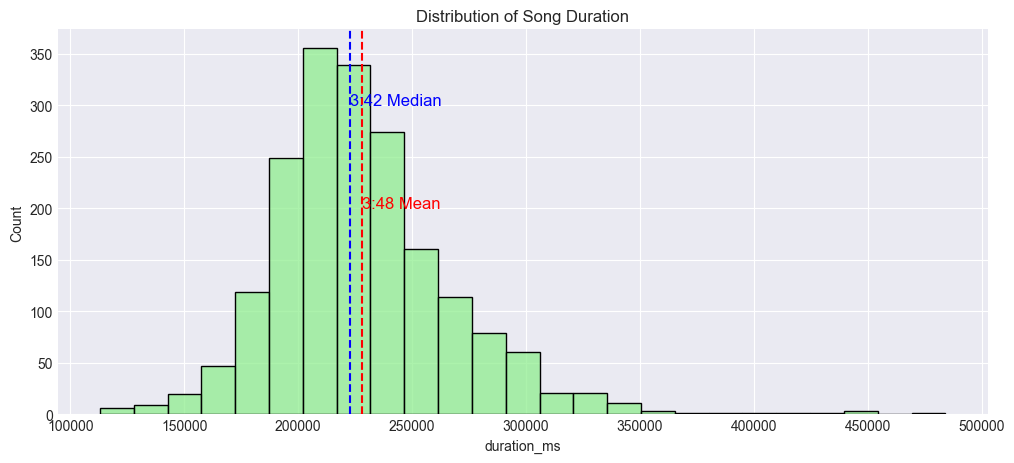

In [22]:
# histogram for distribution of song duration
plt.figure(figsize=(12, 5))
ax = sb.histplot(data=spotify_df, x='duration_ms', bins=25, color='lightgreen')

# add vertical line for mean
plt.axvline(x = np.mean(spotify_df.duration_ms), color = 'red', linestyle = '--')
plt.text(x = np.mean(spotify_df.duration_ms) + 0.01, y = 200, s = '3:48 Mean', color = 'red', fontsize = 12)

# add vertical line for median
plt.axvline(x = np.median(spotify_df.duration_ms), color = 'blue', linestyle = '--')
plt.text(x = np.median(spotify_df.duration_ms) + 0.01, y = 300, s = '3:42 Median', color = 'blue', fontsize = 12)

# add labels
plt.title('Distribution of Song Duration')

plt.show()

Based on the figure above, the histogram provides a visual representation of how song durations are distributed in the dataset. It shows that there is a peak in the distribution around the 3-minute mark (around 180,000 ms to 240,000 ms), indicating that a significant number of songs fall within this duration range. As we move away from this peak, the number of songs with longer or shorter durations decreases. This further supports the observation that top hits tend to cluster around the 3 to 4-minute mark, aligning with the mean and median values.

*Line Plot*

Next, we want to understand how the average duration changes every year and if there are any noticeable changes. To do this, we can use the `lineplot` function to see how this variation happens between the `year` and `duration`.

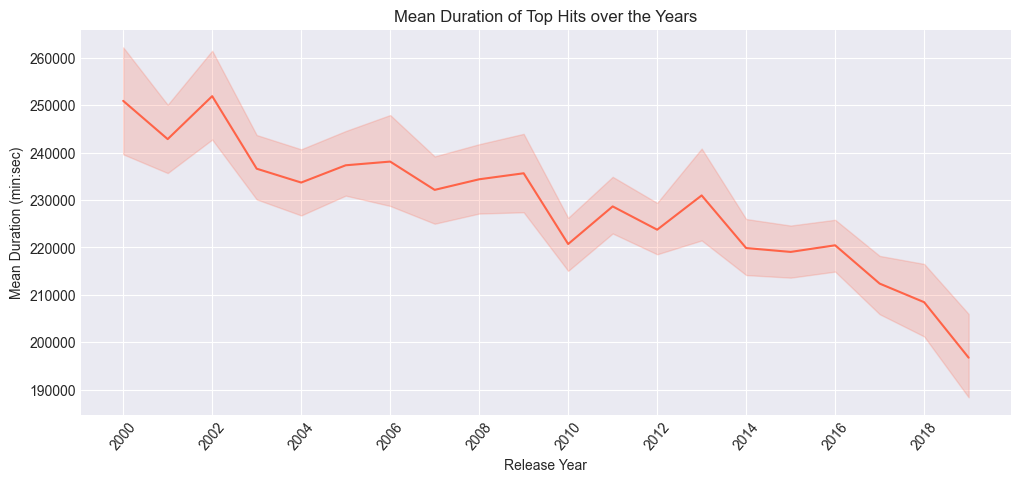

In [23]:
# line plot of the duration of the top hits over the years
plt.figure(figsize=(12, 5))
ax = sb.lineplot(data=spotify_df, x='year', y='duration_ms', color='tomato')

# add labels
plt.title('Mean Duration of Top Hits over the Years')
plt.xlabel('Release Year')
plt.ylabel('Mean Duration (min:sec)')
plt.xticks(np.arange(2000, 2020, 2), rotation=50)

plt.show()

When analyzing the data year by year, we observe intriguing patterns in song durations. The mean and median durations fluctuate over the years, showcasing evolving trends in music composition. For instance, in the early 2000s, song durations were around 4 minutes (240,000 milliseconds) on average, gradually decreasing over the years. The years 2010 and 2011 saw a noticeable dip in average song durations, with tracks around 3 minutes and 40 seconds (220,000 milliseconds). This trend continued until around 2019, where mean song durations reached approximately 3 minutes and 16 seconds (196,000 milliseconds) on average.

Hence, the analysis suggests that the music industry has experienced a shift towards shorter song durations over the years. While early 2000s saw longer top hit songs, the trend gradually evolved towards shorter, more concise tracks. This may be influenced by changes in consumer preferences, streaming platforms, or other industry factors. The line plot above accurately represents and captures this gradual decline in song duration over time.

*Boxplot*

To further understand the average `duration` of top hits per `year` from 2000 to 2019, we can also visualize the dataset through a boxplot to discover its median, interquartile, and outlier distribution. We can simply call the `boxplot` function to do this and place the release year on the x-axis to see how song duration varies over time.

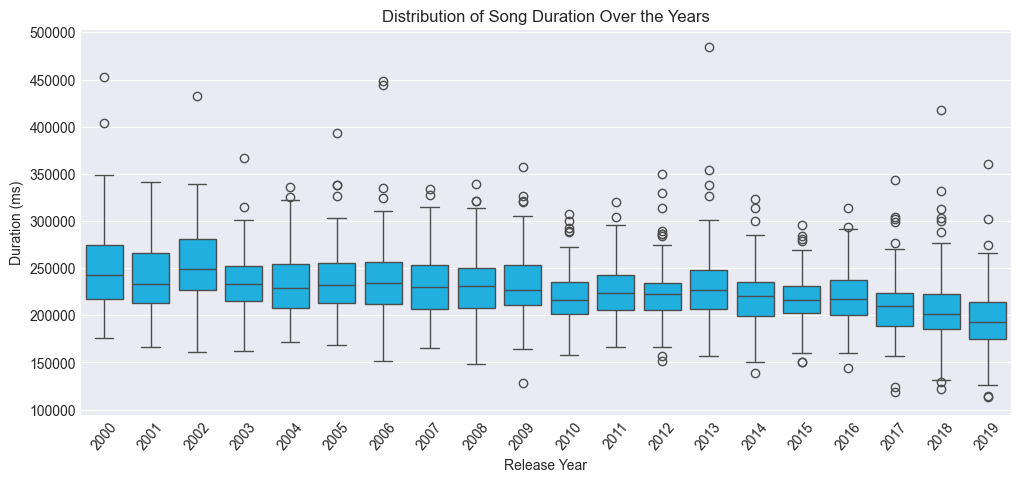

In [24]:
# box plot for distribution of average song duration over the years
plt.figure(figsize=(12, 5))
ax = sb.boxplot(data=spotify_df, x='year', y='duration_ms', color='deepskyblue')

# add labels
plt.title('Distribution of Song Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Duration (ms)')
plt.xticks(rotation = 50)

plt.show()

The boxplot above illustrates the distribution of median song durations for each year in the dataset from 2000 to 2019. In this case, the median duration represents the typical song length for each year.

The median duration (represented by the middle line in the box) of top hits for most years hovers around the 3 minutes (180,000 milliseconds) to 4 minutes (240,000 milliseconds) mark. This suggests a degree of stability in the typical song length over the given period.

Moreover, the interquartile range (represented by the box itself) is typically around 1 minute or 60,000 ms. This indicates that the middle 50% of songs have durations within 1 minute of the median duration. The whisker lengths are also relatively short, indicating that there is not a lot of variability in the data outside of the IQR. However, there are a few outliers in the boxplot, particularly in recent years. For example in late 2000s until late 2010s, there were several songs that were over 5 minutes (300,000 milliseconds) long.

It has also been noted that the boxplot shows that the average duration of songs has decreased slightly over time. The median duration in 2000 was 4 minutes and 2 seconds (242,560 ms), but it had decreased to 3 minutes and 13 seconds (193,143 ms) by 2019. This decrease in the median song duration is also consistent with the findings of the previous analysis.

### Question 3: What is (a) the distribution of the songs according to their level of instrumentalness and (b) the average instrumentalness level per year?

Similar to the previous question, the third question revolves around the relationship between the instrumentalness level of each song, represented by `instrumentalness`, and its corresponding release year, represented by `year`. This specific question observes the distribution of the songs according to instrumentalness, and the average level of instrumentalness per year.

#### Numerical Summaries

To obtain the mean, median, and standard deviation of the `instrumentalness` variable in the dataset, we can use the `agg` function. The `mean` refers to the average of the instrumentalness values observed in the songs. The `median` represents the middle value that indicates the central tendency of this particular feature. Lastly, the `std` denotes the standard deviation, which measures the extent of dispersion or variability in instrumentalness among the songs.

In [25]:
# get the mean median and std
spotify_df.agg({'instrumentalness': ['mean', 'median', 'std']}).round(2)

,instrumentalness
mean,0.02
median,0.00
std,0.09


Based on the table above, the `mean` instrumentalness value is approximately 0.02. This suggests that, on average, the top hit songs tend to be primarily non-instrumental and contain vocals to some extent. The `median` instrumentalness value is 0.00, suggesting that a significant number of tracks in the dataset have no detectable instrumental elements. These songs are essentially vocal-driven and may contribute to their broad appeal and accessibility. The `standard deviation` score of approximately 0.09 reveals some variability in the instrumentalness of these songs. While the mean and median values point to a preference for non-instrumental tracks, the standard deviation indicates that there are exceptions. Some songs may have higher instrumentalness, but they appear to be less common among top hits.

Here, we aim to calculate the average `instrumentalness` rate for top hit songs over the years. The code below extracts the `instrumentalness` and `year` columns from the dataset and then groups the data using the `groupby` function by the `year` to calculate the `mean` and `median` instrumentalness rate for each year.

In [26]:
# avarage instrumentalness rate per year
instrumentalness = spotify_df[['instrumentalness','year']].groupby('year').mean().reset_index()
instrumentalness.round(2)

# median instrumentalness rate per year
instrumentalness_median = spotify_df[['instrumentalness','year']].groupby('year').median().reset_index()
instrumentalness_median.round(2)

# merge both mean and median instrumentalness rate per year
instrumentalness = pd.merge(instrumentalness, instrumentalness_median, on='year')
instrumentalness = instrumentalness.rename(columns={'instrumentalness_x': 'mean', 'instrumentalness_y': 'median'})
instrumentalness.round(2)

,year,mean,median
0,2000,0.03,0.0
1,2001,0.02,0.0
2,2002,0.01,0.0
3,2003,0.04,0.0
4,2004,0.02,0.0
5,2005,0.02,0.0
6,2006,0.00,0.0
7,2007,0.01,0.0
8,2008,0.02,0.0
9,2009,0.03,0.0


Based on the results above, the mean instrumentalness value decreases from 0.03 in the year 2000 to an incredibly low value of 0.0 in 2019. This trend is mirrored in the median instrumentalness values, which consistently stayed at 0.0 throughout the entire timeline. This central tendency aligns with the low mean instrumentalness and emphasizes the consistency in the preference for non-instrumental tracks in the top hit category.

The data shows that, on average, top hit songs across these two decades have had relatively low instrumentalness rates, with the majority of years having a mean rate of 0.01 or 0.02. These findings suggest that over the years, the music in the dataset has become progressively less instrumental and more vocal. Even in 2019, the mean instrumentalness rate of 0.00 indicates a very high likelihood of vocal content in the songs, suggesting that purely vocal tracks or those with minimal instrumental elements became more prevalent. This trend may reflect changing musical preferences or industry dynamics and offers an intriguing insight into the evolution of music characteristics over this 20-year period.

#### Data Visualization

*Histogram*

A **histogram** is utilized to represent the distribution of the `instrumentalness` variable. The `histplot` function can accomplish this with ease, representing the instrumentalness levels as the bars in "pink".

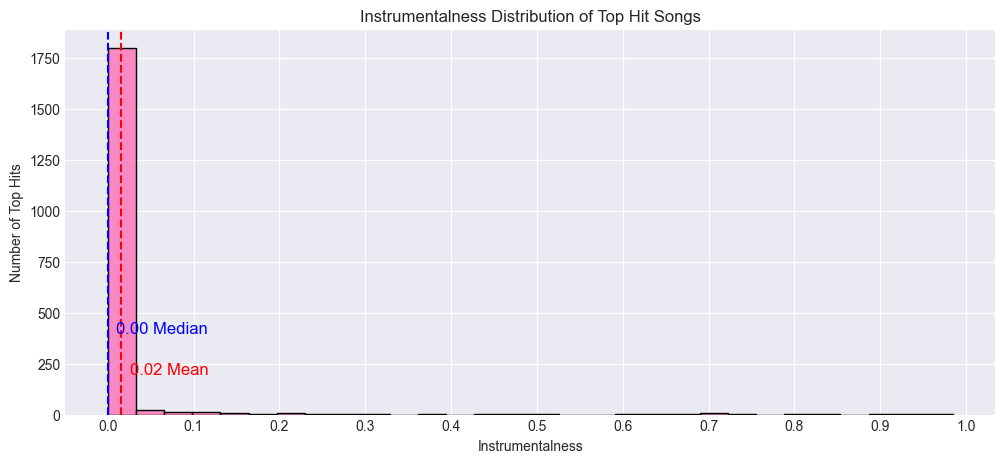

In [27]:
# generate the histogram
plt.figure(figsize=(12, 5))
ax = sb.histplot(data = spotify_df, x = 'instrumentalness', bins = 30, color = 'hotpink')

# add vertical line for mean
plt.axvline(x = np.mean(spotify_df.instrumentalness), color = 'red', linestyle = '--')
plt.text(x = np.mean(spotify_df.instrumentalness) + 0.01, y = 200, s = '0.02 Mean', color = 'red', fontsize = 12)

# add vertical line for median
plt.axvline(x = np.median(spotify_df.instrumentalness), color = 'blue', linestyle = '--')
plt.text(x = np.median(spotify_df.instrumentalness) + 0.01, y = 400, s = '0.00 Median', color = 'blue', fontsize = 12)

# add labels
plt.title('Instrumentalness Distribution of Top Hit Songs')
plt.xlabel('Instrumentalness')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Number of Top Hits')

plt.show()


The histogram displayed above illustrates the distribution of instrumentalness in top hit songs.

The red dashed line represents a `mean` value of approximately 0.02, while the blue dashed line represents a `median` value of approximately 0.00. This suggests that, on average, top hits have a small instrumental component, but that fifty percent of them place a heavy emphasis on vocals.

Examining the histogram, we can see that the distribution of instrumentalness levels is skewed towards the lower end. In this case, the majority of top hits have very low instrumentalness, meaning they are primarily vocal-driven with minimal instrumental accompaniment. This aligns with the low median value, highlighting that a substantial portion of songs have no detectable instrumental elements.

Additionally, the histogram reveals a long tail on the right side, indicating a smaller number of songs with slightly higher instrumentalness. These songs might include genres or tracks where instrumental elements play a more prominent role, although they remain less common among top hits.

*Line Plot*

The visualization of the `lineplot` function below depicts the average `instrumentalness` of top hit songs per year, with each point representing the average `instrumentalness` for a specific year.

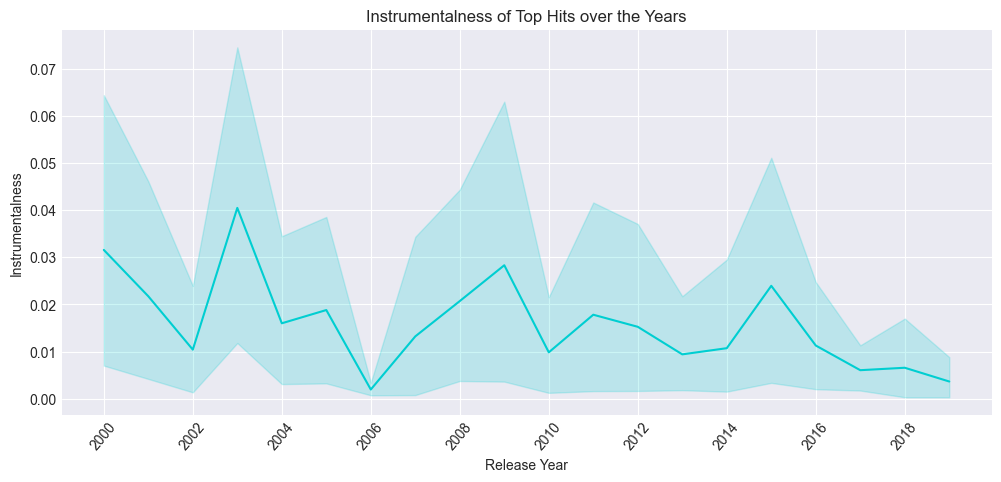

In [28]:
# line plot of the instrumentalness rate of the top hits over the years
plt.figure(figsize=(12, 5))
ax = sb.lineplot(data = spotify_df, x = 'year', y = 'instrumentalness', color = 'darkturquoise')

# add labels
plt.title('Instrumentalness of Top Hits over the Years')
plt.xlabel('Release Year')
plt.ylabel('Instrumentalness')
plt.xticks(np.arange(2000, 2020, 2), rotation=50)

plt.show()

The plot demonstrates that the average `instrumentalness` of top hits fluctuates from year to year, reflecting the industry's evolving trends and styles. The data points are clustered around the values of 0.01 and 0.02, indicating that, on avergae, these top hit songs have consistently maintained a low instrumentalness rate. Over the years, the `average instrumentalness` rate for top hits has fluctuated between 0.00 and 0.04. This variation suggests that the significance of instrumental elements in popular music fluctuates annually.

The visual consistency also aligns with the numerical findings, where the mean instrumentalness rates for each year are consistently low. The line plot further emphasizes that the majority of these songs are primarily vocal-driven, with minimal instrumental elements.

*Box Plot*

Next, we use the `boxplot` function to illustrate the median distribution of `instrumentalness` in top hit songs by year. Each box represents a specific year, and the plot illustrates the evolution of instrumentalness over time.

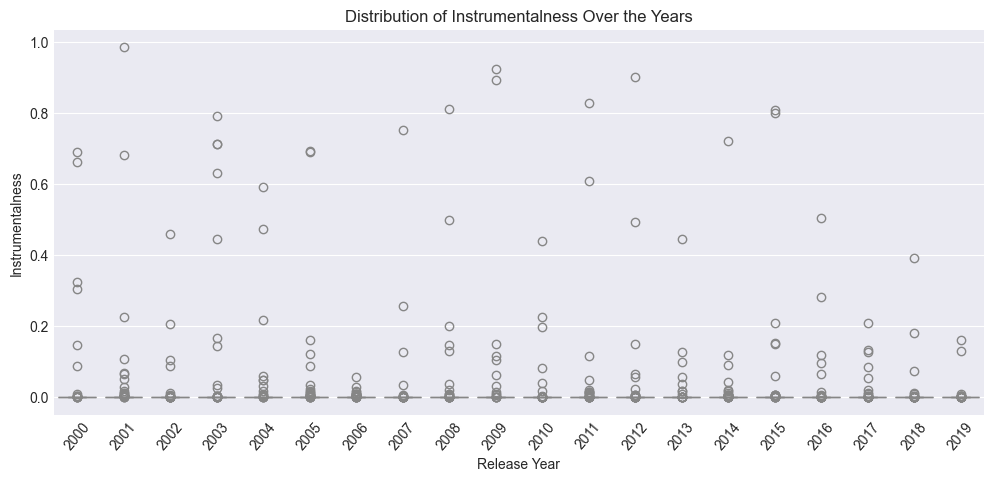

In [29]:
# box plot for distribution of average song instrumentalness rate over the years
plt.figure(figsize=(12, 5))
ax = sb.boxplot(data=spotify_df, x='year', y='instrumentalness', color='pink')

# add labels
plt.title('Distribution of Instrumentalness Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Instrumentalness')
plt.xticks(rotation = 50)

plt.show()

Based on the boxplot, the medians (central lines within the boxes) are consistently at 0.0 for every year, indicating that the typical or central value of instrumentalness in top hit songs remains very low throughout the analyzed period.

The interquartile ranges (the box sizes) are significantly small for each year, suggesting that the majority of songs within a given year have instrumentalness rates close to 0.0. This emphasizes the dominance of vocal-driven compositions. The whiskers (the lines extending from the boxes) are also quite short, indicating that there is limited variation in instrumentalness values within each year. This reaffirms the consistent preference for non-instrumental tracks in the top-hit category. Multiple outliers are also present in the boxplot, with several tracks having scores between 0.0-0.2, and some tracks having instrumental rates of over 0.4 throughout the years.

### Question 4: What is (a) the distribution of the songs according to their level of tempo and (b) the average tempo level per year?

The current EDA question delves into the distribution of songs according to their tempo, and the average level of tempo per year, similar to the previous questions. To do this, we focus on the `year` and `tempo` variables.

#### Numerical Summaries

We will once again use the `agg` function to obtain and calculate the central tendency measures (mean, median, and standard deviation) of the tempo levels of the entire dataset on a 20-year timeline.

In [30]:
# get the mean median and std
spotify_df.agg({'tempo': ['mean', 'median', 'std']}).round(2)

,tempo
mean,120.12
median,120.03
std,26.99


Based on the code execution above, the central tendency measures include the mean tempo being approximately 120.12 bpm, with the median very close at 120.03 bpm. Meanwhile, the standard deviation, measuring the variability in tempo, is approximately 26.99 bpm.

These statistics indicate that the average tempo of the tracks in the dataset hovers around 120 bpm, and the median value closely aligns with this, suggesting that a significant portion of songs maintain this tempo. The standard deviation score also implies that while there is some variation in tempo among the tracks, it is not exceptionally high.

Now, we will obtain and calculate the average tempo level per year. To do this, we will utilize the `groupby` function to aggregate the track tempo levels to their corresponding release years, and the `mean` and `median` functions to calculate the mean and median respectively.

In [31]:
tempoMean = spotify_df[['tempo','year']].groupby('year').mean().reset_index()
tempoMean.round(2)

# include median tempo per year
tempoMed = spotify_df[['tempo','year']].groupby('year').median().reset_index() 

# merge the two dataframes
tempoMeanMed = pd.merge(tempoMean, tempoMed, on='year')
tempoMeanMed = tempoMeanMed.rename(columns={'tempo_x': 'mean', 'tempo_y': 'median'})
tempoMeanMed.round(2)

,year,mean,median
0,2000,112.66,104.50
1,2001,117.41,111.03
2,2002,113.45,102.00
3,2003,119.41,112.97
4,2004,115.01,107.00
5,2005,119.29,118.01
6,2006,113.87,116.95
7,2007,120.71,119.04
8,2008,125.71,126.12
9,2009,125.22,126.00


After reviewing the table statistics displayed above, the data shows that in the earlier years, such as 2000, 2002, and 2006, the mean tempos are notably lower than the dataset's overall mean tempo, while the later years, particularly 2008, 2009, 2011, and 2019, exhibit mean tempos significantly higher than the dataset's average. This suggests that there has been a temporal shift in the tempo of top hits over the years.

Furthermore, it is also evident that the median tempos follow a similar pattern, with certain years, like 2000 and 2012, having considerably lower median tempos compared to the dataset median, and years like 2008, 2009, and 2019 having notably higher median tempos.

#### Data Visualization

*Histogram*

We visualize the data of `tempo` using a histogram once again in order to include the decimal ranges. To accomplish this, we have used the `histplot` function for data visualization, and the  `mean` and `median` functions to represent the averages of the current data.

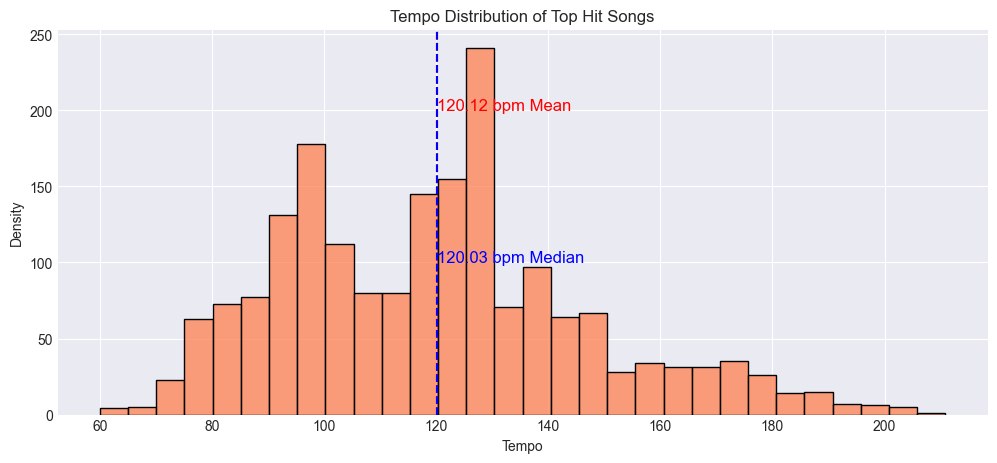

In [32]:
# generate the histogram
plt.figure(figsize=(12, 5))
ax = sb.histplot(data = spotify_df, x = 'tempo', bins = 30, color = 'coral')

# add vertical line for mean
plt.axvline(x = np.mean(spotify_df.tempo), color = 'red', linestyle = '--')
plt.text(x = np.mean(spotify_df.tempo) + 0.01, y = 200, s = '120.12 bpm Mean', color = 'red', fontsize = 12)

# add vertical line for median
plt.axvline(x = np.mean(spotify_df.tempo), color = 'blue', linestyle = '--')
plt.text(x = np.mean(spotify_df.tempo) + 0.01, y = 100, s = '120.03 bpm Median', color = 'blue', fontsize = 12)

# add labels
plt.title('Tempo Distribution of Top Hit Songs')
plt.xlabel('Tempo')
plt.ylabel('Density')

plt.show()

Based on the figure above, we find that the mean and median values are very close to each other, given the mean score of 120.12 bpm and median score of 120.03 bpm. This suggests that, on average, songs in this dataset maintain a consistent tempo, which is typical of many popular music genres. These findings suggest that while there is a predominant tempo, the dataset includes songs with diverse tempos, reflecting the rich musical landscape that spans 20 years.

*Line Plot*

To investigate on the average (mean) tempo level per year from 2000 to 2019, we can utilize a line plot to visualize the fluctuations happening per year. Each exact point in the line plot represents the `mean` tempo level for a specific `year`.

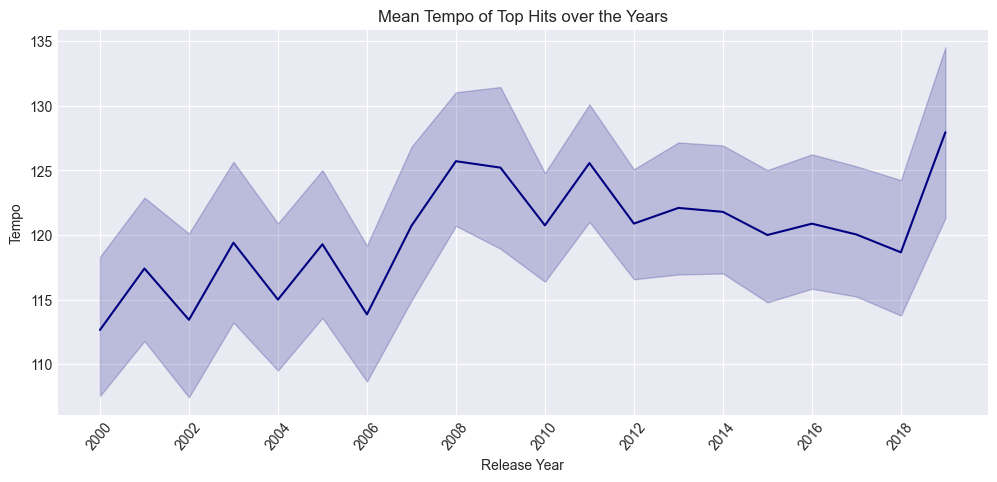

In [33]:
plt.figure(figsize=(12, 5))
ax = sb.lineplot(data = spotify_df, x = 'year', y = 'tempo', color = 'navy')

# add labels
plt.title('Mean Tempo of Top Hits over the Years')
plt.xlabel('Release Year')
plt.ylabel('Tempo')
plt.xticks(np.arange(2000, 2020, 2), rotation=50)

plt.show()

As seen in the line plot displayed above, a general upward trend is revealed in the tracks' mean tempo over the years. The mean tempo generally increased from 112.66 bpm in 2000 to 127.95 bpm in 2009, with a peak around 2008 and 2009 at approximately 125 bpm. Subsequently, it began to decline, reaching a low around 2018. In 2019, it saw a significant spike to approximately 127.95 bpm, the highest value in the dataframe.

It is also evident that there was a shift in tempo trends in the late 2000s, where the mean tempo increased. The subsequent years saw fluctuations in tempo, with 2019 exhibiting a notable increase.

These findings indicate that the divergence in these trends indicates some variability in tempo values. The significant spike in mean tempo in 2019 is a noteworthy observation and suggests that tempo trends in music have not remained static over the years, which could be influenced by various factors including changing music genres and styles.

*Box Plot*

To further investigate the average `tempo` level of top hits per `year` from 2000 to 2019, we can also utilize a box plot to visualize the distribution of scores in different years, along with understanding the variability and changes in tempo over time. In this case, each box represents the tempo's interquartile range for a specific year, the circles indicate outliers, and the plot illustrates how the tempo level evolved over time.

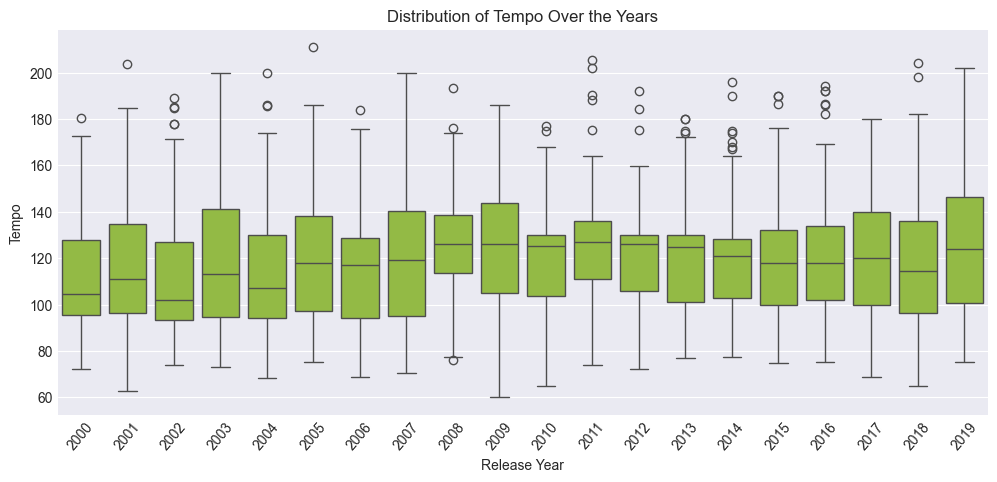

In [34]:
plt.figure(figsize=(12, 5))
ax = sb.boxplot(data=spotify_df, x='year', y='tempo', color='yellowgreen')

# add labels
plt.title('Distribution of Tempo Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Tempo')
plt.xticks(rotation = 50)

plt.show()

Based on the boxplot visualization above, the median tempo values range from 102 bpm (2002) to 126.88 bpm (2011). This indicates that the central tempo for each year varies, with some years having faster median tempos than others. The distribution of tempos is also observed to be skewed to the right, meaning that there are more tracks with faster tempos than slower tempos.

Moreover, the interquartile range (IQR) is relatively consistent across most years but varies from year to year, suggesting moderate variability in tempo. The IQR is at 30 bpm, indicating that the middle 50% of tracks have tempos between 90 and 120 bpm. It has increased over time, from 25 bpm in 2000 to 35 bpm in 2019. This suggests that the range of tempos used has become wider over time.

The whiskers extend to 60 and 180 bpm, respectively, indicating that the majority of tracks have tempos within 60 bpm of the median. Outliers have also been observed in some years, indicating tracks with significantly different tempos compared to the majority of songs in that year.

Overall, the boxplot suggests that the tempo has increased over time, from 104.50 bpm in 2000 to 123.98 bpm in 2019.

### Question 5: What is the relationship between the tracks' duration, instrumentalness, and tempo with the release year?

Lastly, to find the general relationship between all the variables utilized (`duration_ms`, `instrumentalness`, `tempo`) towards the `year` variable, we must compute the values corresponding to their correlation.

#### Numerical Summaries

We create a new DataFrame that includes the variables `year,` `duration_ms` (song duration), `instrumentalness,` and `tempo`. We can then use the `corr` function of the pandas library to easily obtain the correlation values.

In [35]:
instru_tempo_year = spotify_df[['year', 'duration_ms', 'instrumentalness', 'tempo']]
corr = instru_tempo_year.corr()
corr.round(2)

,year,duration_ms,instrumentalness,tempo
year,1.00,-0.31,-0.06,0.08
duration_ms,-0.31,1.00,-0.01,-0.04
instrumentalness,-0.06,-0.01,1.00,0.04
tempo,0.08,-0.04,0.04,1.00


Based on the results above, there is a **weak negative correlation** between the release `year` and song `duration` and `instrumentalness`, suggesting that songs have become slightly shorter in duration and less instrumental over time. In addition, a **weak positive correlation** exists between the `year` of release and song `tempo`, indicating a gradual increase in tempo. However, the correlations are **generally weak**, indicating that these musical attributes are only **modestly related**.

Additionally, there is a **very weak negative correlation** between song `duration` and `instrumentalness`, while there is a **weak negative correlation** between song `duration` and `tempo`. Additionally, there is a **weak positive** relationship between `instrumentality` and `tempo`. 

#### Data Visualization

*Scatterplot*

Now, we use a scatterplot to examine the relationship between the release `year` and the `instrumentalness` of top hits. The scatter plot utilizes the `lmplot` function, showing how the instrumentalness of songs has evolved over the years.

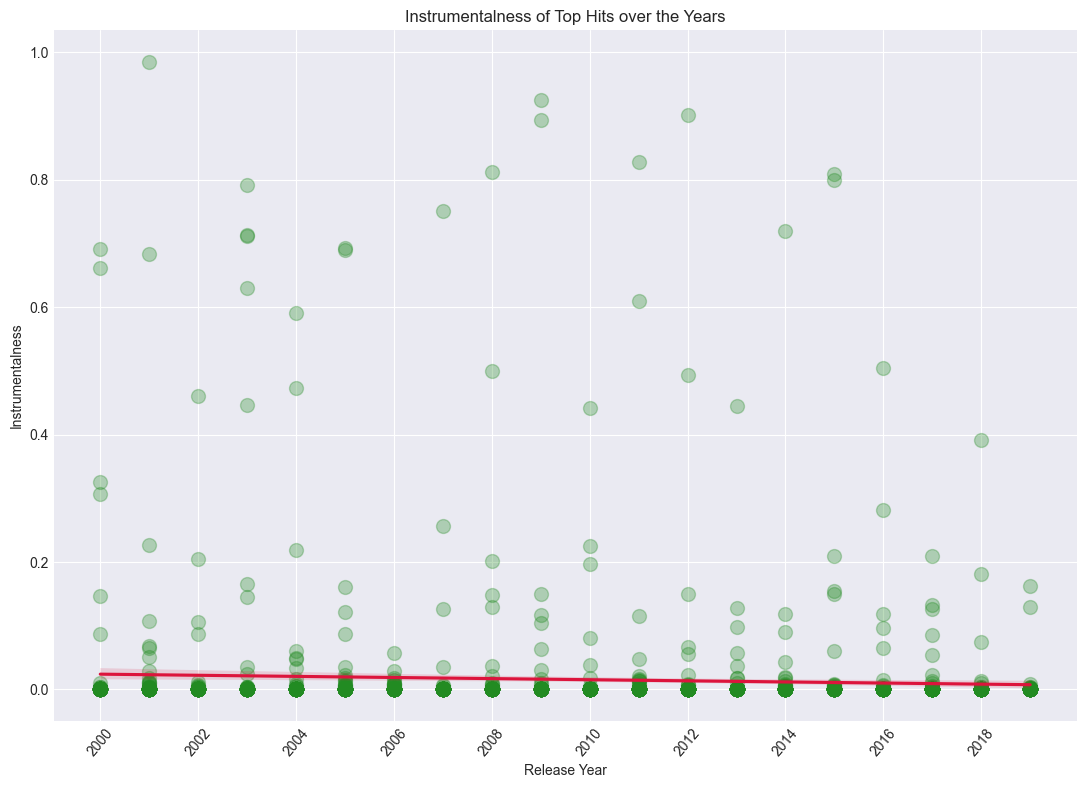

In [36]:
# scatter plot of year vs instrumentalness
ax = sb.lmplot(data = spotify_df, x = 'year', y = 'instrumentalness', scatter_kws = {'s': 100, 'alpha': 0.3, 'color': 'forestgreen'}, line_kws = {'color': 'crimson'})

# adjust size
ax.figure.set_size_inches(12, 8)

# add labels
plt.title('Instrumentalness of Top Hits over the Years')
plt.xlabel('Release Year')
plt.ylabel('Instrumentalness')
plt.xticks(np.arange(2000, 2020, 2), rotation=50)

plt.show()

Based on the scatterplot above from 2000 to 2019, there is a slight but discernible decline in the `instrumentalness` of the top hits. Indicating a preference for songs with a greater degree of vocal content or lyrics, this suggests that recent top hits have, on average, a slightly lower level of instrumentalness.

As we analyze the scatterplot, we can see that the red regression line cuts through the data points. This line represents the general trend in the data. It's a visual representation of how instrumentalness has changed over the years. The fact that the line has a slight downward slope reinforces our observation of decreasing instrumentalness. However, it's crucial to emphasize that this trend isn't exceptionally strong. In other words, while there's a shift towards less instrumental music, it's not the only factor driving the popularity of songs.

The scatterplot also illustrates that there's some variation in the data points. Despite the overarching trend, there are exceptions, given the presence of outliers. The presence of some highly instrumental songs in the top hits remained a constant factor over the years.

Overall, the scatterplot supports the numerical summary aforementioned that the song's instrumentalness rate and release year have a weak negative correlation, with a score of -0.06.

In the next figure below, a scatter plot with a trendline is utilized to examine the relationship between the release `year` and `tempo` of the top hit songs. The scatter plot, generated with the `lmplot` function, graphically illustrates the variation in tempo levels from years 2000 to 2019.

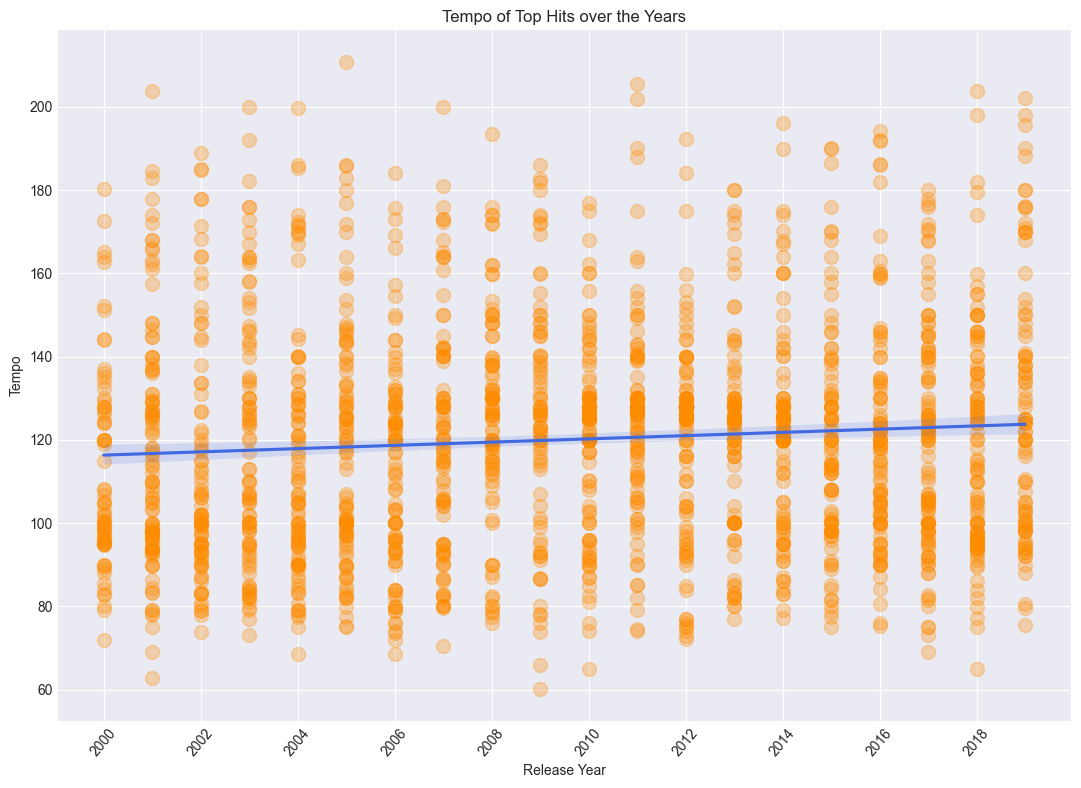

In [37]:
# scatter plot of year vs tempo
ax = sb.lmplot(data = spotify_df, x = 'year', y = 'tempo', scatter_kws = {'s': 100, 'alpha': 0.3, 'color': 'darkorange'}, line_kws = {'color': 'royalblue'})

# adjust size
ax.figure.set_size_inches(12, 8)

# add labels
plt.title('Tempo of Top Hits over the Years')
plt.xlabel('Release Year')
plt.ylabel('Tempo')
plt.xticks(np.arange(2000, 2020, 2), rotation=50)

plt.show()

Based on the scatterplot above, the `tempo` has increased subtly but noticeably over the years. This suggests that, on average, the tempos of more recent top hits tend to be slightly faster. The upward slope of the regression line reinforces our observation of an increasing tempo in recent top hits. However, it's vital to recognize that this trend is not overwhelmingly pronounced. The scatterplot also reveals variations in the data points. This variation implies that there are exceptions to the trend. Some songs with slower tempos have still managed to become chart-toppers, underscoring the rich diversity within the music industry.

The scatterplot also supports our findings in the numerical summary where the relationship between a song's tempo and its release year are slightly positively correlated, given the correlation score of +0.08.

Now, we use a scatter plot again below with a trendline to examine the relationship between the release `year` and the `duration` of top hit songs. The scatter plot, generated with the `lmplot` function, represents visually the variation in song durations from 2000 to 2019. 

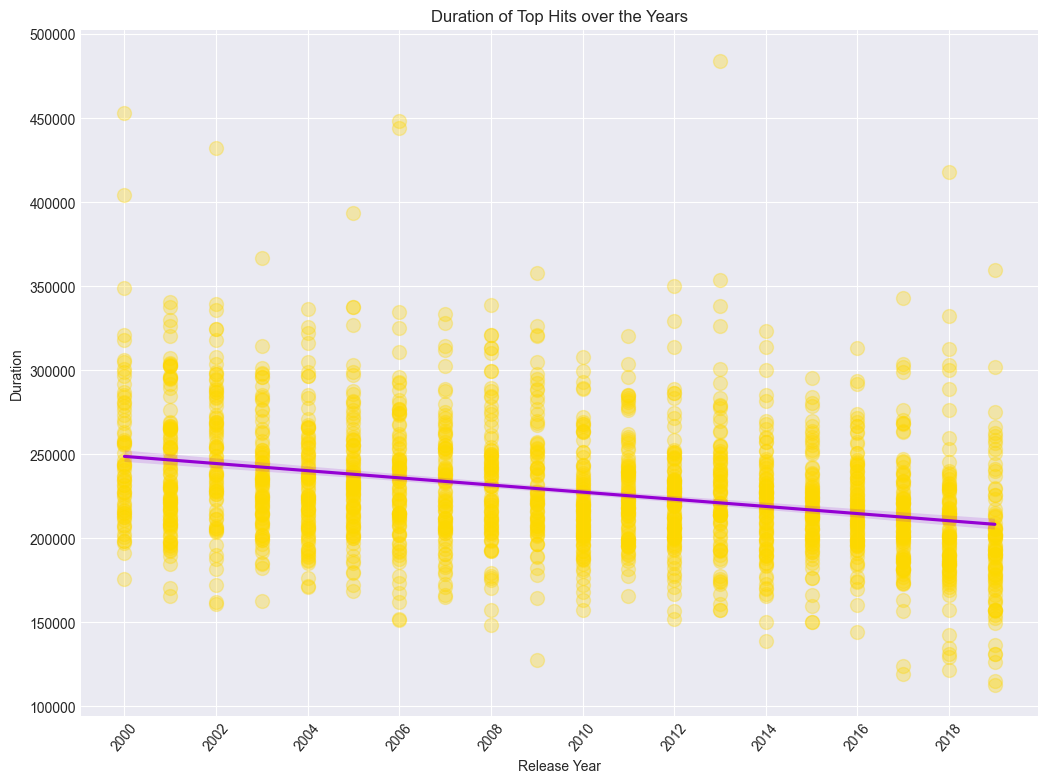

In [38]:
# scatter plot of year vs duration
ax = sb.lmplot(data = spotify_df, x = 'year', y = 'duration_ms', scatter_kws = {'s': 100, 'alpha': 0.3, 'color': 'gold'}, line_kws = {'color': 'darkviolet'})

# adjust size
ax.figure.set_size_inches(12, 8)

# add labels
plt.title('Duration of Top Hits over the Years')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.xticks(np.arange(2000, 2020, 2), rotation=50)

plt.show()

Based on the scatterplot above, there is a discernible pattern indicating that the average duration of these songs has decreased over time as the regression line's negative slope underscores the decreasing trend in song durations over the years. This indicates that recent top-hit songs are typically shorter in `duration` than those from earlier years. It is essential to note, however, that this trend is not overly pronounced, indicating that song duration alone does not determine a song's success. It merely reflects a general preference for shorter songs in recent years due to the spread of data around the regression line.

*Heatmap*

After displaying the relationships between the variables through scatterplots, we can proceed to visualization using the seaborn library to display a correlation heatmap for easy analysis with the help of the `subplots`, `triu`, `diverging_palette`, and `heatmap functions`.

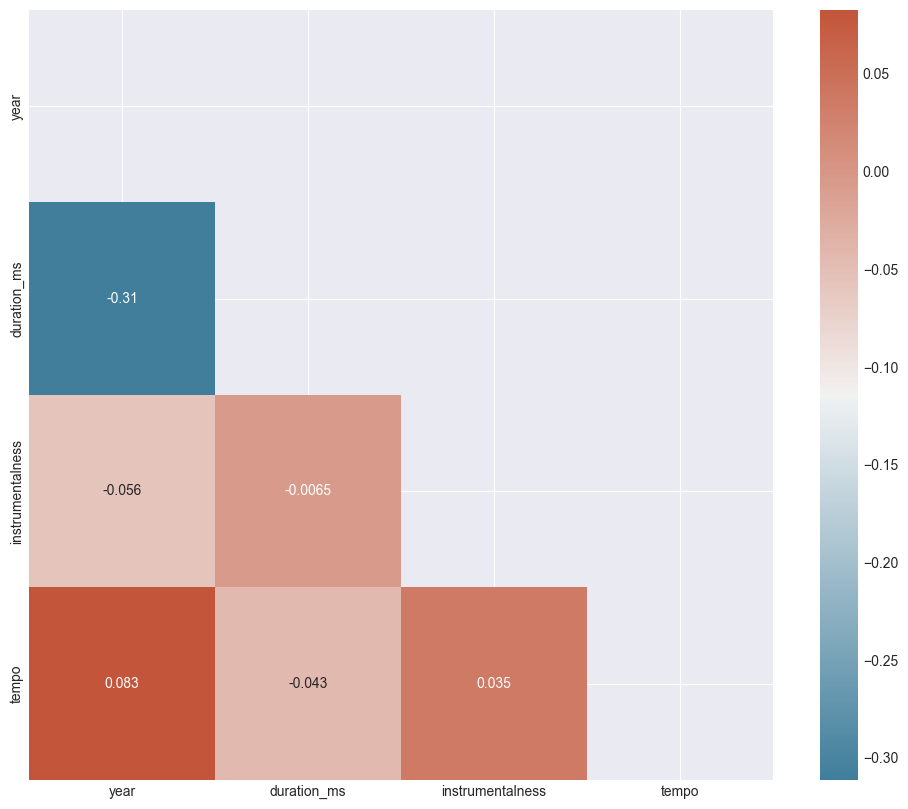

In [39]:
# Heatmap Design
f, ax = plt.subplots(figsize = (12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(corr, annot=True, cmap=cmap, mask=mask)

plt.show()

The results displayed above is a heatmap used to visualize the correlations between variables within the dataset. A color scale allows us to observe the relationships between variables. When there is a strong positive correlation between two variables, they appear in warmer colors, such as red. When two variables have a strong negative correlation, they appear in cooler colors, such as the darkest blue. By analyzing the heatmap, we can determine which attributes have a strong correlation, a weak correlation, or no correlation at all.

The correlation between `duration_ms` and `year` with a score of -0.31 displayed in the darkest blue indicates a **strong negative correlation**. It suggests that as the number of years since a song's release increases, its duration tends to decrease. It is noted that if a song `duration` is relatively short and the release `year` is more recent, then it suggests that recent top hits are typically shorter than those from earlier years, possibly due to evolving attention spans and consumption habits of music listeners.

The observed correlation value of -0.056 between the variables `instrumentalness` and `year`, represented by the lightest shade of red, suggests a **weaker negative correlation**. This observation implies a slight tendency for songs to exhibit a decrease in instrumentalness as time progresses. If the release `year` is more recent and the `instrumentalness` is relatively low, it may suggest that recent top hits have fewer instrumental elements, indicating a shift toward more lyric-driven or vocal-centric songs.

In the case of tempo and year, the darkest red correlation value of 0.083 indicates a **strong positive correlation**. It suggests that there is a slight correlation between the `tempo` and `year` of top-charting songs. If the release `year` is more recent and the `tempo` is relatively high, then it suggests that the songs have generally become faster-paced and more energetic over time, possibly reflecting changing musical trends and styles.

## Research Question

In the Exploratory Data Analysis portion of this notebook, the questions stated were heavily oriented towards understanding the relationship between the different numerical variables present in the dataset with a song's release year, specifically the `year` variable. In doing so, the goal of the EDA was to determine whether or not a trend was present in the relationships acquired. By focusing on the numerical values present in the dataset, we were able to visualize and confirm that the data could be used in a predictive manner.

As such, with the proper investigation and solving the questions stated in the Exploratory Data Analysis portion of the notebook, the following research question was hypothesized:

---
### Can we cluster and determine when a song is/was released depending on the following variables: (1) duration, (2) instrumentalness, and (3) tempo?
---

### Rationale for Research Question based on Exploratory Data Analysis

The results obtained from the Exploratory Data Analysis suggest that out of the 3 numerical representations anaylzed, all 3 could provide insights and proper clustering for the dataset. This can be attributed to how 3 variables out of the entire 14 numerical ones are already capable of providing the clustering algorithm with the right amount of generalization and specificity. Additionally, all variables have a reasonable amount of evidence suggesting a distinguishable difference between the distribution of values for each song entry.

The EDA demonstrated that these three variables (i.e., `duation_ms`, `instrumentalness`, and `tempo`) are consistent enough to identify a song's release year potentially as they exhibited distinct trends across different time periods. Over the years, it was shown that a song's average `duration` gradually declined from 250,000 ms down to the 190,000 ms range. On the other hand, `instrumentalness` yielded results that showed a strong vocal presence for each song released that became a hit. To put into perspective, the values lie near 0.0, showing that the songs contain more vocals than are purely instrumental. Since we're trying to determine when a song was released, adding in the `tempo` may be beneficial, as based on the EDA, the tempo has been slowly increasing around the 112-127 bpm mark, which strongly suggests that it may have something to do with the genre that became popular each year. We also notice that as the years go by, there has been a gradual increase in the tempo of the songs released, hinting that upbeat songs are what music listeners are into nowadays. These patterns align with shifting musical preferences and styles. With such clear trends, it's reasonable to hypothesize that these variables can be utilized for clustering to group songs into different time periods or musical movements. For example, songs with short durations, high instrumentalness, and fast tempos might be indicative of songs from a particular era or genre, while songs with contrasting characteristics could belong to another cluster. This research question stems directly from the EDA's findings, as it aims to leverage these trends to classify songs into distinct temporal categories.

Moreover, the justification for this research question lies in the potential practical applications it offers. By clustering songs based on these variables, it becomes possible to build a predictive model that can estimate the release year of a song. This makes it possible to uncover distinct patterns specific to different decades or musical movements. For instance, a cluster characterized by short duration, high instrumentalness, and a fast tempo may represent classic jazz or rock hits from the mid-20th century. Meanwhile, another cluster with a longer duration, low instrumentalness, and a moderate tempo might correspond to contemporary pop songs.

Therefore, it is sufficiently acceptable to infer that all the 3 variables chosen from the Exploratory Data Analysis have the greatest potential to yield accurate results for clustering each song track into different time periods.

### Significance of Research Question

Providing insights and answers for this research question would have the potential to aid in identifying how music has evolved over time and how it reflects the musical trend and cultural context of each period. Doing so would enable people to obtain a deeper and more meaningful understanding of the historical and cultural context and meaning of music.

The study may also improve current predictive measures and further expand its applications in technological and musical aspects such as artificial intelligence prediction, music recommendation systems, music generation, etc. By understanding the trends associated with different musical periods, these findings can be integrated into AI models for predicting and generating music styles that are reflective of specific decades or genres. Music recommendation systems could also benefit from this research, as they could provide users with more context-aware music recommendations based on their preferences for certain musical eras.

Moreover, the project may also become a foundation for new developments in the music industry, allowing more fields within it to either flourish in a new time period or for a new area to initialize. It can provide valuable insights for music producers, artists, and labels to adapt their creative strategies to evolving musical preferences and styles.

Lastly, other similar research studies may utilize this one in order to create other predictive measures with regard to the clustering of a song's release year that would be based on other numerical variables related to a track.

In essence, the significance of this research question transcends academic boundaries and has practical applications that can shape the future of the music industry and the understanding of musical evolution.

# CSMODEL Case Study - Phase 2

## Statistical Inference

### Hypotheses

In order to proceed with the testing for this notebook, we must first create 3 sets of hypotheses, one for each variable to be observed, in order to obtain flow and direction towards an established goal. Moreover, the study itself is hypothesized to garner something that's similar to a trend or baseline that would serve as a form of cipher on a song's release year based on the chosen variables, regardless if the song itself has already been released or is yet to be released.

As we are also trying to determine if whether or not the chosen variables have any relationship with a song's release year, this does not necessarily mean that each variable is also closely related to each other. At the very least, it should show some form of pattern that could be dependent on the individuality of each variable.

With that said, the following hypotheses for each factor were constructed:

#### Song Duration

***$H_0$:*** *There is no significant relationship between a song's duration to its release year.*

***$H_A$:*** *There is a significant relationship between a song's duration to its release year.*

#### Instrumentalness Rate

***$H_0$:*** *There is no significant relationship between a song's instrumentalness to its release year.*

***$H_A$:*** *There is a significant relationship between a song's instrumentalness to its release year.*

#### Tempo Level

***$H_0$:*** *There is no significant relationship between a song's tempo to its release year.*

***$H_A$:*** *There is a significant relationship between a song's tempo to its release year*

### Data Preprocessing

Before we can initiate any form of hypothesis testing, we must first preprocess the relevant data once again to identify whether or not the dataset contains the ideal content required for the reseach question and is ready to conduct satisfactory testing with the proper conditions.

Since the initial data pre-processing already narrowed down the variables used in the Exploratory Data Analysis and did not further minimize which variables to use, there is no point in dropping irrelevant data as there exists none at this point.

Moving forward, (wording blah blah for binning data values into categorical groups of data). This is done in order to generalize the overly-specific nature of the current dataset, which could make the results obtained to also be too centralized and unusable.

In [49]:
def year_binning(year):
    last_digit = year % 10
    decade = '2000s' if year < 2010 else '2010s'
    if last_digit <= 3:
        return 'early ' + decade
    elif last_digit <= 6:
        return 'mid ' + decade
    else:
        return 'late ' + decade
    
spotify_df['year_period'] = spotify_df['year'].apply(year_binning)
spotify_df[['year', 'year_period']]


,year,year_period
0,2000,early 2000s
3,2000,early 2000s
4,2000,early 2000s
6,2000,early 2000s
7,2000,early 2000s
...,...,...
1995,2019,late 2010s
1996,2019,late 2010s
1997,2019,late 2010s
1998,2019,late 2010s


#### Song Duration

#### Instrumentalness Rate

#### Tempo Level

### Hypothesis Testing

#### Song Duration

#### Instrumentalness Rate

#### Tempo Level

## Data Modelling

### Data Preprocessing

### Clustering

## Summary of Insights

### Statistical Analysis

#### Song Duration

#### Instrumentalness Rate

#### Tempo Level

### Data Preprocessing

#### Song Duration

#### Instrumentalness Rate

#### Tempo Level

### Hypothesis Testing

#### Song Duration

#### Instrumentalness Rate

#### Tempo Level

### Clustering

## Conclusion

## References

Koverha, M. (2022). Top hits spotify from 2000-2019. Kaggle. https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data